 # 2.1.1 Table Visualization
 • Print the Wine dataset’s metadata and its variable information
 • Print the first five rows of the dataset
 • Print a table in which the columns are the variables and the rows are:
 1. count
 2. mean
 3. standard deviation
 4. minimum value
 5. 25% percentile
 6. median
 7. 75% percentile
 8. maximum value

In [37]:
import pandas as pd

# wine.data 파일 로드
# 열 이름이 없으므로, wine.names 파일 또는 문서에서 제공되는 정보를 바탕으로 열 이름을 지정합니다.
column_names = ['Class'] + [f'Feature_{i}' for i in range(1, 14)]
wine_data = pd.read_csv('wine.data', header=None, names=column_names)

In [38]:
# 데이터셋의 기본 정보 출력
wine_data.info()

# 데이터셋의 처음 다섯 행 출력
print("\n데이터셋의 처음 다섯 행:")
print(wine_data.head())

# 데이터셋의 기술통계 출력
print("\n데이터셋의 기술통계:")
print(wine_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Class       178 non-null    int64  
 1   Feature_1   178 non-null    float64
 2   Feature_2   178 non-null    float64
 3   Feature_3   178 non-null    float64
 4   Feature_4   178 non-null    float64
 5   Feature_5   178 non-null    int64  
 6   Feature_6   178 non-null    float64
 7   Feature_7   178 non-null    float64
 8   Feature_8   178 non-null    float64
 9   Feature_9   178 non-null    float64
 10  Feature_10  178 non-null    float64
 11  Feature_11  178 non-null    float64
 12  Feature_12  178 non-null    float64
 13  Feature_13  178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB

데이터셋의 처음 다섯 행:
   Class  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0      1      14.23       1.71       2.43       15.6        127       2.80   
1      1      1

 # 2.1.2 Histogram Visualization
 • Plot a histogram for each variables of the Wine dataset.

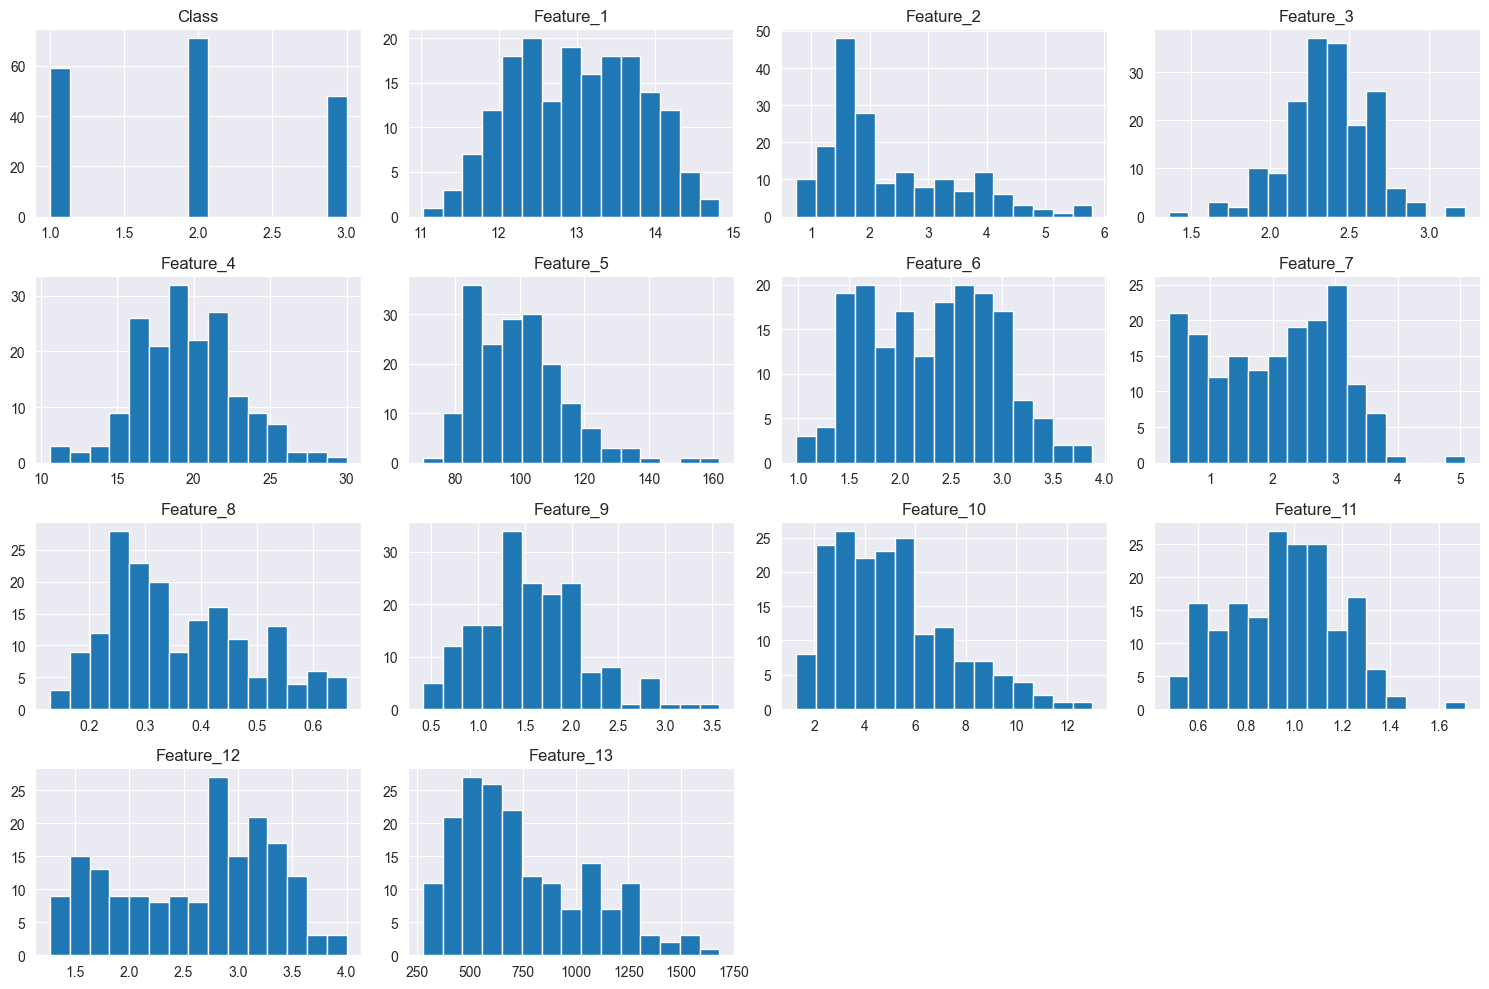

In [39]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
wine_data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# 2.2.1 User-defined Function
 • Define a train-test split function named ’Split_train_test’ from page 85 of our textbook.
 • Divide the Wine dataset into train and test sets. Set the test ratio as 0.2
 • Print the length of the train set and the test set.
 • Describe two limitations of this function.

In [40]:
from sklearn.model_selection import train_test_split

X = wine_data.drop('Class', axis=1)
y = wine_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분할된 데이터셋 크기 출력
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 142 samples
Test set size: 36 samples


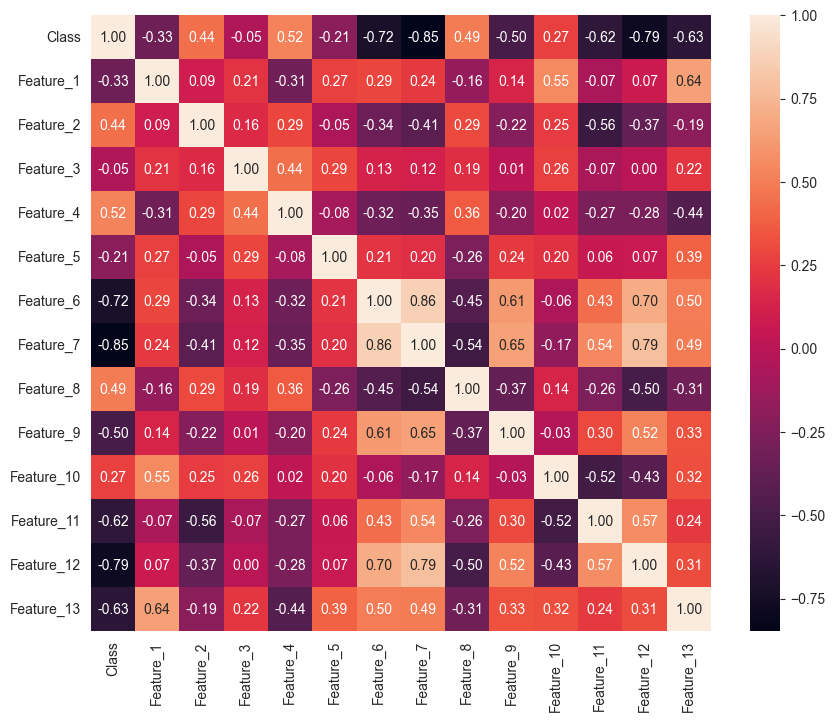

In [41]:
import seaborn as sns

# 상관관계 행렬 계산
corr = wine_data.corr()

# 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [42]:
# 누락값 확인
print(wine_data.isnull().sum())

# 이 데이터셋은 누락값이 없지만, 누락값이 있을 경우 평균값으로 대체하는 예시입니다.
# wine_data.fillna(wine_data.mean(), inplace=True)

Class         0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
dtype: int64


In [43]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
import numpy as np

# 데이터셋 로드
df = pd.read_csv('diamonds.csv')

# 범주형 변수 확인
categorical_columns = df.select_dtypes(include=['object']).columns

In [44]:
# 3.1.1 Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])

In [45]:
# 3.1.2 One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False)
cut_encoded = one_hot_encoder.fit_transform(df[['cut']])
print("One-Hot Encoded 'cut' variable's first 5 samples:\n", cut_encoded[:5])

One-Hot Encoded 'cut' variable's first 5 samples:
 [[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]


C:\Users\heal\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
# 연속형 변수 확인
continuous_columns = df.select_dtypes(include=[np.number]).columns
# 3.2.1 MinMaxScaling
min_max_scaler = MinMaxScaler()
df[continuous_columns] = min_max_scaler.fit_transform(df[continuous_columns])
print("\nFirst five rows after MinMaxScaling:\n", df.head())


First five rows after MinMaxScaling:
       carat   cut     color   clarity     depth     table     price       'x'  \
0  0.006237  0.50  0.166667  0.428571  0.513889  0.230769  0.000000  0.367784   
1  0.002079  0.75  0.166667  0.285714  0.466667  0.346154  0.000000  0.362197   
2  0.006237  0.25  0.166667  0.571429  0.386111  0.423077  0.000054  0.377095   
3  0.018711  0.75  0.833333  0.714286  0.538889  0.288462  0.000433  0.391061   
4  0.022869  0.25  1.000000  0.428571  0.563889  0.288462  0.000487  0.404097   

        'y'       'z'  
0  0.067572  0.076415  
1  0.065195  0.072642  
2  0.069100  0.072642  
3  0.071817  0.082704  
4  0.073854  0.086478  


In [47]:
# 데이터셋 다시 로드하여 StandardScaling 수행
df = pd.read_csv('diamonds.csv')
# 3.1.1 Ordinal Encoding 다시 수행 (StandardScaling에 앞서 필요)
df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])

In [48]:
# 3.2.2 StandardScaling
standard_scaler = StandardScaler()
df[continuous_columns] = standard_scaler.fit_transform(df[continuous_columns])
print("\nFirst five rows after StandardScaling:\n", df.head())


First five rows after StandardScaling:
       carat       cut     color   clarity     depth     table     price  \
0 -1.198168 -0.538099 -0.937163 -0.484264 -0.174092 -1.099672 -0.904095   
1 -1.240361  0.434949 -0.937163 -1.064117 -1.360738  1.585529 -0.904095   
2 -1.198168 -1.511147 -0.937163  0.095589 -3.385019  3.375663 -0.903844   
3 -1.071587  0.434949  1.414272  0.675442  0.454133  0.242928 -0.902090   
4 -1.029394 -1.511147  2.002131 -0.484264  1.082358  0.242928 -0.901839   

        'x'       'y'       'z'  
0 -1.587837 -1.536196 -1.571129  
1 -1.641325 -1.658774 -1.741175  
2 -1.498691 -1.457395 -1.741175  
3 -1.364971 -1.317305 -1.287720  
4 -1.240167 -1.212238 -1.117674  
